In [3]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def box_filter(matrix, box_filter_size=3):
    height, width = matrix.shape
    img_copy = np.zeros_like(matrix, dtype=np.float32)

    half_filter = box_filter_size // 2

    for i in range(height):
        for j in range(width):
            value = 0
            for k in range(-half_filter, half_filter + 1):
                for l in range(-half_filter, half_filter + 1):
                    updated_x = i + k
                    updated_y = j + l
                    if 0 <= updated_x < height and 0 <= updated_y < width:
                        value += matrix[updated_x, updated_y]
            img_copy[i, j] = np.around(value / (box_filter_size * box_filter_size), 2)

    return img_copy

def weighted_filter(matrix):
    height, width = matrix.shape
    img_copy = np.zeros_like(matrix, dtype=np.float32)

    kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]], dtype=np.float32) / 16

    half_kernel_size = kernel.shape[0] // 2

    for i in range(height):
        for j in range(width):
            value = 0
            for k in range(-half_kernel_size, half_kernel_size + 1):
                for l in range(-half_kernel_size, half_kernel_size + 1):
                    updated_x = i + k
                    updated_y = j + l
                    if 0 <= updated_x < height and 0 <= updated_y < width:
                        value += matrix[updated_x, updated_y] * kernel[k + half_kernel_size, l + half_kernel_size]
            img_copy[i, j] = np.around(value, 2)

    return img_copy

def median_filter(matrix, kernel_size=(3, 3)):
    height, width = matrix.shape
    result = np.zeros_like(matrix)
    k_height, k_width = kernel_size
    k_half_height, k_half_width = k_height // 2, k_width // 2

    for i in range(height):
        for j in range(width):
            values = []
            for k in range(-k_half_height, k_half_height + 1):
                for l in range(-k_half_width, k_half_width + 1):
                    if 0 <= i + k < height and 0 <= j + l < width:
                        values.append(matrix[i + k, j + l])
            result[i, j] = np.median(np.sort(values))

    return result

def min_filter(matrix, kernel_size=(3, 3)):
    height, width = matrix.shape
    result = np.zeros_like(matrix)
    k_height, k_width = kernel_size
    k_half_height, k_half_width = k_height // 2, k_width // 2

    for i in range(height):
        for j in range(width):
            values = []
            for k in range(-k_half_height, k_half_height + 1):
                for l in range(-k_half_width, k_half_width + 1):
                    if 0 <= i + k < height and 0 <= j + l < width:
                        values.append(matrix[i + k, j + l])
            result[i, j] = np.min(np.sort(values))

    return result

def max_filter(matrix, kernel_size=(3, 3)):
    height, width = matrix.shape
    result = np.zeros_like(matrix)
    k_height, k_width = kernel_size
    k_half_height, k_half_width = k_height // 2, k_width // 2

    for i in range(height):
        for j in range(width):
            values = []
            for k in range(-k_half_height, k_half_height + 1):
                for l in range(-k_half_width, k_half_width + 1):
                    if 0 <= i + k < height and 0 <= j + l < width:
                        values.append(matrix[i + k, j + l])
            result[i, j] = np.max(np.sort(values))

    return result


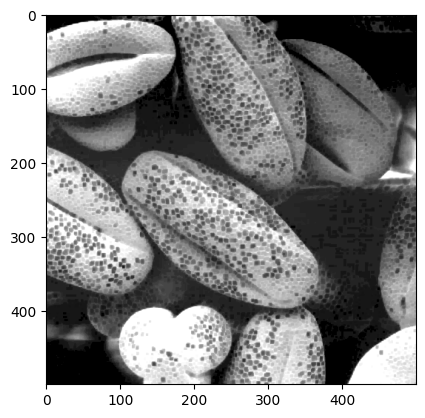

In [11]:
img = cv2.imread('/content/drive/MyDrive/dip_Images/Fig0316(1)(top_left).tif', cv2.IMREAD_GRAYSCALE)
filtered_img = min_filter(img)
plt.imshow(filtered_img,cmap='gray')